In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/Applied Data Science/Thesis/Code'

/content/drive/MyDrive/Applied Data Science/Thesis/Code


In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
four_journal_train_data_set = pd.read_csv('/content/drive/MyDrive/Applied Data Science/Thesis/Code/Data (CSV)/four_journal_train_data_set.csv', encoding="utf-8-sig")
two_journal_test_data_set = pd.read_csv('/content/drive/MyDrive/Applied Data Science/Thesis/Code/Data (CSV)/two_journal_test_data_set.csv', encoding="utf-8-sig")

## Inspect section length

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


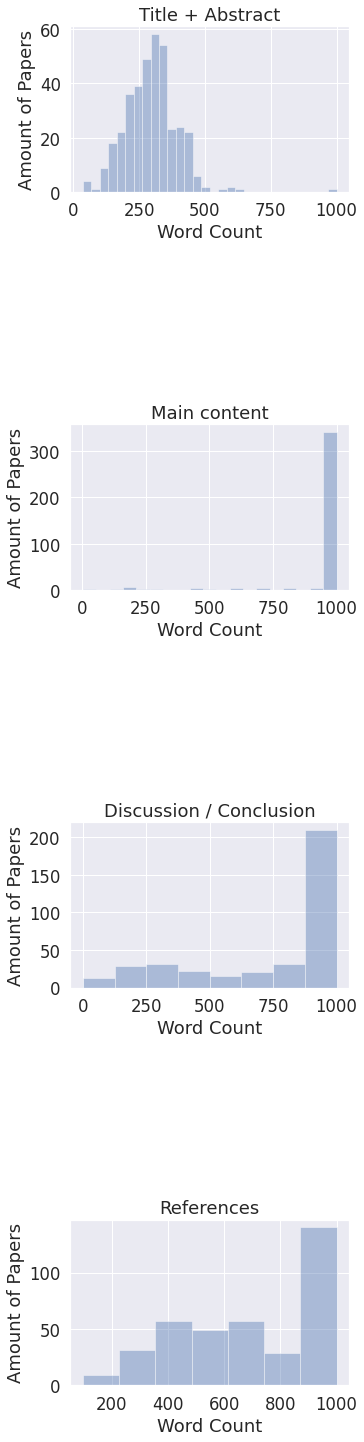

In [9]:
paper_sections = ['Title + Abstract PP S', 'Main content PP S', 'Discussion / Conclusion PP S', 'References PP S']
paper_sections_names = ['Title + Abstract', 'Main content', 'Discussion / Conclusion', 'References']
count=1

plt.subplots(figsize=(5, 25))


for section in paper_sections:
  paper_sections_name = section[0:-5]
  if four_journal_train_data_set[section].isnull().values.any():
    nan_values = four_journal_train_data_set[four_journal_train_data_set[section].isnull()]
    four_journal_train_data_set = four_journal_train_data_set[~four_journal_train_data_set.ID.isin(nan_values.ID)]

  amount_of_words = []
  for i in range(len(four_journal_train_data_set)):
    amount_of_words.append(len(four_journal_train_data_set[section].iloc[i].split()))

  sns.set(style="darkgrid")
  sns.set(font_scale=1.5)

  plt.rcParams["figure.figsize"] = (10,5)

  lengths = [min(l, 1000) for l in amount_of_words]

  plt.subplot(7,1,count)
  plt.xlabel("Word Count")
  plt.ylabel("Amount of Papers")
  sns.distplot(lengths, kde=False, rug=False).set(title=paper_sections_name)
  count += 2

plt.show()

